# Clustering the Countries by using Unsupervised Learning for HELP International

<b>Objective:</b>
To categorise the countries using socio-economic and health factors that determine the overall development of the country.

<b>About organization:</b>
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

<b>Problem Statement:</b>
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

## Table of Contents <a id = "top">
1. [EDA](#EDA)
2. [Data Visualization](#visualizations)
3. [K Means](#kmeans)
4. [Mini Batch K-Means](#mb-kmeans)
5. [Gaussian Mixture Model](#gmm)
6. [Hierarchical Model](#hm)
7. [DBScan](#dbscan)
8. [Mean Shift](#ms)
9. [BIRCH](#birch)
10. [Affinity Propagation](#ap)

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

# References
1. https://www.kaggle.com/code/melissamonfared/country-clustering-eda-pca/notebook
2. https://realpython.com/python-folium-web-maps-from-data/
3. https://austinlasseter.medium.com/using-folium-to-generate-a-simple-map-of-your-pandas-data-87ddc5d55f8d
4. https://medium.com/@aakash013/geospatial-data-visualization-with-folium-geopandas-092673eeaa35
5. https://realpython.com/k-means-clustering-python/

In [49]:
# https://medium.com/@nomannayeem/mastering-exploratory-data-analysis-eda-a-comprehensive-python-pandas-guide-for-data-insights-c0be7c5b8889
df = pd.read_csv('data\Country-data.csv')

# EDA <a id="EDA"></a>
[Back to Top](#top)

In [50]:
# Display the first 5 rows of the DataFrame
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [51]:
# List all coumns of the datatset
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [52]:
df.info

<bound method DataFrame.info of                  country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2      

In [53]:
# Returns (number_of_rows, number_of_columns)
df.shape

(167, 10)

In [54]:
# Provides a statistical summary of numerical columns, including count, mean, standard deviation, min, and max values.
df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [55]:
# Handling missing values
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [56]:
# Get duplicates
duplicated = df.duplicated()

In [57]:
# https://note.nkmk.me/en/python-pandas-duplicated-drop-duplicates/
print(df.duplicated().sum())

0


In [58]:
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [111]:
best_model = pd.DataFrame({'model':[], 'sil_score':[], 'ch_score':[]})

# Data Visualization <a id = "visualizations"></a>
[Back to Top](#top)    

In [26]:
# !pip install folium
import folium
from branca.element import Figure

In [27]:
# Load GeoJSON file for country boundaries
geojson_url = "https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json"

In [28]:
fig1 = Figure(width=550,height=350)

In [29]:
# political_countries_url = (
#     "http://geojson.xyz/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson"
# )

# Initialize the map centered around the world
m1 = folium.Map(location=(30, 10), zoom_start=2, tiles="cartodb positron")

# folium.GeoJson(political_countries_url).add_to(m)

# m.save("footprint.html")

In [30]:
# Create a Choropleth layer
folium.Choropleth(
    geo_data=geojson_url,
    data=df,
    columns=["country", "child_mort"],  # Adjust column names to match your CSV
    key_on="feature.properties.name",  # Match with country names in GeoJSON
    fill_color="YlOrRd",  # Color scheme: Yellow -> Orange -> Red
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Child Mortality Rate (per 1,000 live births)"
).add_to(m1)

fig1.add_child(m1)

# Display the map
# m.save("child_mortality_map.html")  # Saves the map as an HTML file
# print("Map saved as child_mortality_map.html")

In [31]:
fig2 = Figure(width=550,height=350)

# Initialize the map centered around the world
m2 = folium.Map(location=(30, 10), zoom_start=2, tiles="cartodb positron")
folium.Choropleth(
    geo_data=geojson_url,
    data=df,
    columns=["country", "exports"],  # Adjust column names to match your CSV
    key_on="feature.properties.name",  # Match with country names in GeoJSON
    fill_color="YlOrRd",  # Color scheme: Yellow -> Orange -> Red
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Exports of goods and services per capita. Given as %age of the GDP per capita"
).add_to(m2)

fig2.add_child(m2)

In [32]:
fig3 = Figure(width=550,height=350)

# Initialize the map centered around the world
m3 = folium.Map(location=(30, 10), zoom_start=2, tiles="cartodb positron")
folium.Choropleth(
    geo_data=geojson_url,
    data=df,
    columns=["country", "health"],  # Adjust column names to match your CSV
    key_on="feature.properties.name",  # Match with country names in GeoJSON
    fill_color="YlOrRd",  # Color scheme: Yellow -> Orange -> Red
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Total health spending per capita. Given as %age of GDP per capita"
).add_to(m3)

fig3.add_child(m3)

In [33]:
fig4 = Figure(width=550,height=350)

# Initialize the map centered around the world
m4 = folium.Map(location=(30, 10), zoom_start=2, tiles="cartodb positron")
folium.Choropleth(
    geo_data=geojson_url,
    data=df,
    columns=["country", "imports"],  # Adjust column names to match your CSV
    key_on="feature.properties.name",  # Match with country names in GeoJSON
    fill_color="YlOrRd",  # Color scheme: Yellow -> Orange -> Red
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Imports of goods and services per capita. Given as %age of the GDP per capita"
).add_to(m4)

fig4.add_child(m4)

In [34]:
fig5 = Figure(width=550,height=350)

# Initialize the map centered around the world
m5 = folium.Map(location=(30, 10), zoom_start=2, tiles="cartodb positron")
folium.Choropleth(
    geo_data=geojson_url,
    data=df,
    columns=["country", "income"],  # Adjust column names to match your CSV
    key_on="feature.properties.name",  # Match with country names in GeoJSON
    fill_color="YlOrRd",  # Color scheme: Yellow -> Orange -> Red
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Net income per person"
).add_to(m5)

fig5.add_child(m5)

In [35]:
fig6 = Figure(width=550,height=350)

# Initialize the map centered around the world
m6 = folium.Map(location=(30, 10), zoom_start=2, tiles="cartodb positron")
folium.Choropleth(
    geo_data=geojson_url,
    data=df,
    columns=["country", "inflation"],  # Adjust column names to match your CSV
    key_on="feature.properties.name",  # Match with country names in GeoJSON
    fill_color="YlOrRd",  # Color scheme: Yellow -> Orange -> Red
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="The measurement of the annual growth rate of the Total GDP"
).add_to(m6)

fig6.add_child(m6)

In [36]:
fig7 = Figure(width=550,height=350)

# Initialize the map centered around the world
m7 = folium.Map(location=(30, 10), zoom_start=2, tiles="cartodb positron")
folium.Choropleth(
    geo_data=geojson_url,
    data=df,
    columns=["country", "life_expec"],  # Adjust column names to match your CSV
    key_on="feature.properties.name",  # Match with country names in GeoJSON
    fill_color="YlOrRd",  # Color scheme: Yellow -> Orange -> Red
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="The average number of years a new born child would live if the current mortality patterns are to remain the same"
).add_to(m7)

fig7.add_child(m7)

In [37]:
fig8 = Figure(width=550,height=350)

# Initialize the map centered around the world
m8 = folium.Map(location=(30, 10), zoom_start=2, tiles="cartodb positron")
folium.Choropleth(
    geo_data=geojson_url,
    data=df,
    columns=["country", "total_fer"],  # Adjust column names to match your CSV
    key_on="feature.properties.name",  # Match with country names in GeoJSON
    fill_color="YlOrRd",  # Color scheme: Yellow -> Orange -> Red
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="The number of children that would be born to each woman if the current age-fertility rates remain the same."
).add_to(m8)

fig8.add_child(m8)

In [38]:
fig9 = Figure(width=550,height=350)

# Initialize the map centered around the world
m9 = folium.Map(location=(30, 10), zoom_start=2, tiles="cartodb positron")
folium.Choropleth(
    geo_data=geojson_url,
    data=df,
    columns=["country", "gdpp"],  # Adjust column names to match your CSV
    key_on="feature.properties.name",  # Match with country names in GeoJSON
    fill_color="YlOrRd",  # Color scheme: Yellow -> Orange -> Red
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="The GDP per capita. Calculated as the Total GDP divided by the total population."
).add_to(m9)

fig9.add_child(m9)

In [39]:
# !pip install pycountry-convert

In [40]:
import pycountry_convert as pc

In [41]:
# Function to map country to continent
def get_continent(country):
    try:
        country_code = pc.country_name_to_country_alpha2(country)
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_mapping = {
            "NA": "North America",
            "SA": "South America",
            "EU": "Europe",
            "AF": "Africa",
            "AS": "Asia",
            "OC": "Oceania"
        }
        return continent_mapping.get(continent_code, "Unknown")
    except Exception:
        return "Unknown"

# Apply function to create 'Continent' column
df["continent"] = df["country"].apply(get_continent)

# Display the DataFrame
print(df)

                 country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp      continent  
0         9.44        56.2       5.82    553     

In [42]:
# https://www.kaggle.com/code/ericnarro/example-usage-of-continent-boundaries-files
# !pip install geopandas
import geopandas as gpd
gdf_7_continents = gpd.read_file("data\continent_boundaries_7\continent_boundaries_7.gpkg")

In [43]:
type(gdf_7_continents)

geopandas.geodataframe.GeoDataFrame

In [44]:
gdf_7_continents

CONTINENT  OBJECTID          SQMI          SQKM   Shape_Leng  \
0             Africa         1  1.158346e+07  3.000115e+07   426.208612   
1         Antarctica         7  4.754809e+06  1.231495e+07  1587.227698   
2               Asia         2  1.731728e+07  4.485173e+07  2331.623746   
3  Australia-Oceania         3  2.973612e+06  7.701651e+06   252.165311   
4             Europe         8  3.821854e+06  9.898597e+06  1596.706533   
5      North America         4  9.339528e+06  2.418936e+07  3954.892430   
6      South America         6  6.856255e+06  1.775769e+07   622.552582   

    Shape_Area                                           geometry  
0  2559.073098  MULTIPOLYGON (((57.57249 -20.51417, 57.52945 -...  
1  6034.461899  MULTIPOLYGON (((-146.79948 -76.71641, -146.835...  
2  5432.085227  MULTIPOLYGON (((72.48720 -7.38194, 72.43817 -7...  
3   695.539921  MULTIPOLYGON (((158.88218 -54.71139, 158.87967...  
4  1444.638513  MULTIPOLYGON (((23.84853 35.52298, 23.97138 35...  
5  3707.418684  MULTIPOLYGON (((-75.52722 35.23554, -75.61000 ...  
6  1539.312933  MULTIPOLYGON (((-67.51140 -55.81778, -67.49424...

In [45]:
# gdf_7_continents.rename(columns={'CONTINENT':'continent'}, inplace=True)
gdf_7_continents.rename(columns={'CONTINENT':'Continent'}, inplace=True)
df.rename(columns={'continent':'Continent'}, inplace=True)

In [ ]:
fig10 = Figure(width=550,height=350)

# Merge the GeoDataFrame with life expectancy data
continent_gdf = gdf_7_continents.merge(df, on="Continent")

# Initialize the Folium map
m10 = folium.Map(location=[20, 0], zoom_start=2, tiles="cartodb positron")

# Add the Choropleth layer
folium.Choropleth(
    geo_data=continent_gdf,
    data=continent_gdf,
    columns=["Continent", "child_mort"],
    key_on="feature.properties.Continent",  # Ensure the property matches your dataset
    fill_color="YlGnBu",  # Yellow-Green-Blue color scheme
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Death of children under 5 years of age per 1000 live births"
).add_to(m10)

fig10.add_child(m10)

In [ ]:
fig11 = Figure(width=550,height=350)

# Merge the GeoDataFrame with life expectancy data
# continent_gdf = gdf_7_continents.merge(df, on="Continent")

# Initialize the Folium map
m11 = folium.Map(location=[20, 0], zoom_start=2, tiles="cartodb positron")

# Add the Choropleth layer
folium.Choropleth(
    geo_data=continent_gdf,
    data=continent_gdf,
    columns=["Continent", "exports"],
    key_on="feature.properties.Continent",  # Ensure the property matches your dataset
    fill_color="YlGnBu",  # Yellow-Green-Blue color scheme
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Exports of goods and services per capita. Given as %age of the GDP per capita"
).add_to(m11)

fig11.add_child(m11)

In [ ]:
fig12 = Figure(width=550,height=350)

# Merge the GeoDataFrame with life expectancy data
# continent_gdf = gdf_7_continents.merge(df, on="Continent")

# Initialize the Folium map
m12 = folium.Map(location=[20, 0], zoom_start=2, tiles="cartodb positron")

# Add the Choropleth layer
folium.Choropleth(
    geo_data=continent_gdf,
    data=continent_gdf,
    columns=["Continent", "health"],
    key_on="feature.properties.Continent",  # Ensure the property matches your dataset
    fill_color="YlGnBu",  # Yellow-Green-Blue color scheme
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Total health spending per capita. Given as %age of GDP per capita"
).add_to(m12)

fig12.add_child(m12)

In [ ]:
fig13 = Figure(width=550,height=350)

# Merge the GeoDataFrame with life expectancy data
# continent_gdf = gdf_7_continents.merge(df, on="Continent")

# Initialize the Folium map
m13 = folium.Map(location=[20, 0], zoom_start=2, tiles="cartodb positron")

# Add the Choropleth layer
folium.Choropleth(
    geo_data=continent_gdf,
    data=continent_gdf,
    columns=["Continent", "imports"],
    key_on="feature.properties.Continent",  # Ensure the property matches your dataset
    fill_color="YlGnBu",  # Yellow-Green-Blue color scheme
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Imports of goods and services per capita. Given as %age of the GDP per capita"
).add_to(m13)

fig13.add_child(m13)

In [ ]:
fig14 = Figure(width=550,height=350)

# Merge the GeoDataFrame with life expectancy data
# continent_gdf = gdf_7_continents.merge(df, on="Continent")

# Initialize the Folium map
m14 = folium.Map(location=[20, 0], zoom_start=2, tiles="cartodb positron")

# Add the Choropleth layer
folium.Choropleth(
    geo_data=continent_gdf,
    data=continent_gdf,
    columns=["Continent", "income"],
    key_on="feature.properties.Continent",  # Ensure the property matches your dataset
    fill_color="YlGnBu",  # Yellow-Green-Blue color scheme
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Net income per person"
).add_to(m14)

fig14.add_child(m14)

In [ ]:
fig15 = Figure(width=550,height=350)

# Merge the GeoDataFrame with life expectancy data
# continent_gdf = gdf_7_continents.merge(df, on="Continent")

# Initialize the Folium map
m15 = folium.Map(location=[20, 0], zoom_start=2, tiles="cartodb positron")

# Add the Choropleth layer
folium.Choropleth(
    geo_data=continent_gdf,
    data=continent_gdf,
    columns=["Continent", "inflation"],
    key_on="feature.properties.Continent",  # Ensure the property matches your dataset
    fill_color="YlGnBu",  # Yellow-Green-Blue color scheme
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="The measurement of the annual growth rate of the Total GDP"
).add_to(m15)

fig15.add_child(m15)

In [ ]:
fig16 = Figure(width=550,height=350)

# Merge the GeoDataFrame with life expectancy data
# continent_gdf = gdf_7_continents.merge(df, on="Continent")

# Initialize the Folium map
m16 = folium.Map(location=[20, 0], zoom_start=2, tiles="cartodb positron")

# Add the Choropleth layer
folium.Choropleth(
    geo_data=continent_gdf,
    data=continent_gdf,
    columns=["Continent", "life_expec"],
    key_on="feature.properties.Continent",  # Ensure the property matches your dataset
    fill_color="YlGnBu",  # Yellow-Green-Blue color scheme
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="The average number of years a new born child would live if the current mortality patterns are to remain the same"
).add_to(m16)

fig16.add_child(m16)

In [ ]:
fig17 = Figure(width=550,height=350)

# Merge the GeoDataFrame with life expectancy data
# continent_gdf = gdf_7_continents.merge(df, on="Continent")

# Initialize the Folium map
m17 = folium.Map(location=[20, 0], zoom_start=2, tiles="cartodb positron")

# Add the Choropleth layer
folium.Choropleth(
    geo_data=continent_gdf,
    data=continent_gdf,
    columns=["Continent", "total_fer"],
    key_on="feature.properties.Continent",  # Ensure the property matches your dataset
    fill_color="YlGnBu",  # Yellow-Green-Blue color scheme
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="The number of children that would be born to each woman if the current age-fertility rates remain the same."
).add_to(m17)

fig17.add_child(m17)

In [ ]:
fig18 = Figure(width=550,height=350)

# Merge the GeoDataFrame with life expectancy data
continent_gdf = gdf_7_continents.merge(df, on="Continent")

# Initialize the Folium map
m18 = folium.Map(location=[20, 0], zoom_start=2, tiles="cartodb positron")

# Add the Choropleth layer
folium.Choropleth(
    geo_data=continent_gdf,
    data=continent_gdf,
    columns=["Continent", "gdpp"],
    key_on="feature.properties.Continent",  # Ensure the property matches your dataset
    fill_color="YlGnBu",  # Yellow-Green-Blue color scheme
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="The GDP per capita. Calculated as the Total GDP divided by the total population."
).add_to(m18)

fig18.add_child(m18)

# Scaling

In [60]:
# !pip install kneed
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

In [61]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [62]:
len(df.columns)

10

In [63]:
X = df.iloc[:, 1:-1]

In [64]:
X

child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9    1610       9.44        56.2   
1          16.6     28.0    6.55     48.6    9930       4.49        76.3   
2          27.3     38.4    4.17     31.4   12900      16.10        76.5   
3         119.0     62.3    2.85     42.9    5900      22.40        60.1   
4          10.3     45.5    6.03     58.9   19100       1.44        76.8   
..          ...      ...     ...      ...     ...        ...         ...   
162        29.2     46.6    5.25     52.7    2950       2.62        63.0   
163        17.1     28.5    4.91     17.6   16500      45.90        75.4   
164        23.3     72.0    6.84     80.2    4490      12.10        73.1   
165        56.3     30.0    5.18     34.4    4480      23.60        67.5   
166        83.1     37.0    5.89     30.9    3280      14.00        52.0   

     total_fer  
0         5.82  
1         1.65  
2         2.89  
3         6.16  
4         2.13  
..         ...  
162       3.50  
163       2.47  
164       1.95  
165       4.67  
166       5.40  

[167 rows x 8 columns]

In [65]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [66]:
X

array([[ 1.29153238, -1.13827979,  0.27908825, ...,  0.15733622,
        -1.61909203,  1.90288227],
       [-0.5389489 , -0.47965843, -0.09701618, ..., -0.31234747,
         0.64786643, -0.85997281],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.78927429,
         0.67042323, -0.0384044 ],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.40973191,
         0.28695762, -0.66120626],
       [ 0.44841668, -0.40647827, -0.59727159, ...,  1.50091625,
        -0.34463279,  1.14094382],
       [ 1.11495062, -0.15034774, -0.33801514, ...,  0.59001454,
        -2.09278484,  1.6246091 ]])

# K-Means <a id="kmeans"></a>
[Back to Top](#top)

In [67]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

It is used in k-means clustering to find the optimal ‘K’ value (the number of data clusters partitioned during clustering). This method is typically done by picking out the K value where the elbow (the point where a curve noticeably bends) is created. 

In [68]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)
kl.elbow

4

In [69]:
# Apply K-Means clustering with the chosen number of clusters (from the elbow method, usually 3-5)
optimal_clusters = kl.elbow  # Adjust based on Elbow graph
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Analyze clusters
print(df.groupby('Cluster').mean())

# Identify the cluster with the lowest socio-economic and health indicators
cluster_vulnerable = df.groupby('Cluster').mean().idxmin()

# Extract countries in the most vulnerable cluster
vulnerable_countries = df[df['Cluster'] == cluster_vulnerable['gdpp']]['country']

print("\nCountries that need the most aid based on clustering:")
print(vulnerable_countries)

         child_mort     exports    health     imports        income  \
Cluster                                                               
0         24.798462   39.042908  5.466462   44.845629  11423.384615   
1         91.610417   29.571042  6.433542   43.133333   3897.354167   
2          7.245098   46.666667  8.896275   46.574510  34146.470588   
3          4.133333  176.000000  6.793333  156.666667  64033.333333   

         inflation  life_expec  total_fer          gdpp  
Cluster                                                  
0         8.870323   72.281538   2.428308   5405.261538  
1        11.911146   59.239583   4.992083   1909.208333  
2         2.820706   78.366667   1.778627  30379.019608  
3         2.468000   81.433333   1.380000  57566.666667  

Countries that need the most aid based on clustering:
0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26        

## Silhouette score

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters.

The silhouette score() function needs a minimum of two clusters, or it will raise an exception. 
1. The value of the silhouette analysis coefﬁcient is between [-1, 1].
2. A score of 1 denotes the best, meaning that the data point i is very compact within the cluster it belongs to and far away from the other clusters.
3. The worst value is -1. Values near 0 denote overlapping clusters.

In [70]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

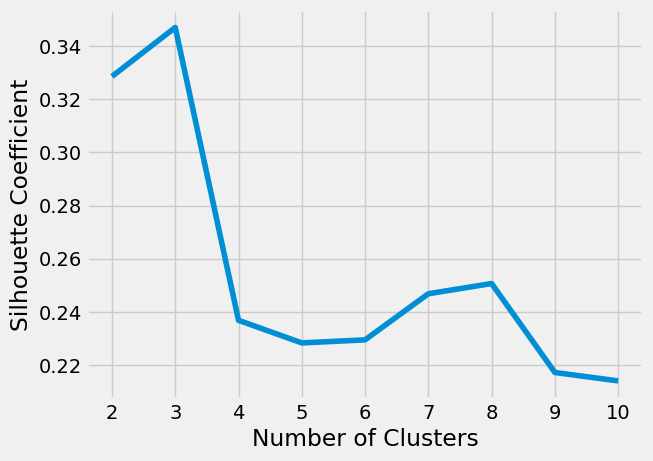

In [71]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [72]:
# Find the best K
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
best_k = range_n_clusters[np.argmax(silhouette_coefficients)]
print(f"Optimal K based on silhouette score: {best_k}")

Optimal K based on silhouette score: 3


In [73]:
print (*silhouette_coefficients)

0.3285621671534965 0.3469850512889601 0.23686905119212048 0.22835876076983078 0.22951347728344235 0.24685342878799132 0.2506916881142313 0.21724090782117383 0.21407540984367956


## Calinski-Harabasz Index

It can be used to evaluate the model when ground truth labels are not known where the validation of how well the clustering has been done is made using quantities and features inherent to the dataset. It is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). Higher value of CH index means the clusters are dense and well separated, although there is no “acceptable” cut-off value. We need to choose that solution which gives a peak or at least an abrupt elbow on the line plot of CH indices.

The Calinski-Harabasz Index (CH Index) is a metric used to evaluate the quality of clustering in K-Means. It measures the compactness and separation of clusters, helping to determine the optimal number of clusters (K).

### How to Determine the Best Calinski-Harabasz Index for K-Means

1. Compute CH Index for Different K Values
- Run K-Means clustering for different values of K (e.g., 2 to 10 clusters).
- Calculate the Calinski-Harabasz Index for each K.
- A higher CH Index indicates better-defined clusters.

2. Choose the K with the Highest CH Index
- The optimal K is typically the one with the highest CH Index.
- If multiple values of K have similar scores, choose the one that makes the most business sense.

3. Compare with Other Metrics
- Use the Elbow Method (WCSS plot) to check if the chosen K aligns with the rate of decrease in inertia.
- Use the Silhouette Score to ensure clusters are well-separated.

In [74]:
calinski_harabasz = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    score = calinski_harabasz_score(X, kmeans.labels_)
    calinski_harabasz.append(score)

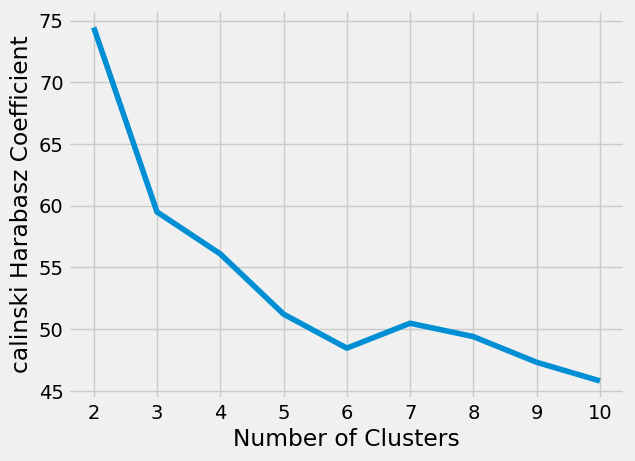

In [75]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), calinski_harabasz)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("calinski Harabasz Coefficient")
plt.show()

In [76]:
# Find the best K
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
best_k = range_n_clusters[np.argmax(calinski_harabasz)]
print(f"Optimal K based on silhouette score: {best_k}")

Optimal K based on silhouette score: 2


In [113]:
best_model.loc[len(best_model.index)] = [f"Kmeans",silhouette_score(X, kmeans.labels_),calinski_harabasz_score(X, kmeans.labels_)]

In [114]:
best_model

model  sil_score   ch_score
0  Kmeans   0.159426  35.554768

# Mini-Batch K-Means <a id="mb-kmeans"></a>
[Back to Top](#top)

Mini-Batch K-Means is a variant of the K-Means clustering algorithm designed for large datasets. Instead of processing the entire dataset at once, it uses smaller subsets called "mini-batches" in each iteration, making it computationally faster. This approach trades off some accuracy for significant speed improvements, particularly when dealing with massive amounts of data. 

Why Use Mini-Batch K-Means Instead of Regular K-Means?
- Faster execution (processes mini-batches instead of the full dataset).
- Less memory-intensive, making it ideal for large-scale socio-economic analysis.
- Produces similar clustering results but trades slight accuracy for speed.
- Suitable for dynamic data, since it converges faster in iterative updates.

Steps in the Solution
- Load and preprocess the dataset (Country-data.csv).
- Determine the optimal number of clusters using the Elbow Method.
- Apply Mini-Batch K-Means clustering with the chosen K.
- Analyze cluster results to find countries in urgent need of aid.

Key Differences Between Mini-Batch K-Means & Regular K-Means

<table class="demo">
<thead>
    <tr>
        <th>Feature</th>
        <th>K-Means</th>
        <th>Mini-Batch K-Means</th>
    </tr>
    </thead>
    <tbody>
    <tr>
        <td>Processing Mode</td>
        <td>Full dataset in each iteration</td>
        <td>Mini-batches for faster execution</td>
    </tr>
    <tr>
        <td>Speed</td>
        <td>Slower on large data</td>
        <td>Faster with minimal accuracy loss</td>
    </tr>
    <tr>
        <td>Memory Usage</td>
        <td>High (stores entire dataset)</td>
        <td>Low (processes small batches)</td>
    </tr>
    <tr>
        <td>Accuracy</td>
        <td>High precision clusters</td>
        <td>Slightly less precise but efficient</td>
    </tr>    
    <tr>
        <td>Use Case</td>
        <td>Small to medium datasets</td>
        <td>Large-scale clustering problems</td>
    </tr>         
    </tbody>
</table>


How This Solution Works
- Mini-Batch K-Means speeds up clustering, making it ideal for global socio-economic analysis.
- Uses the Elbow Method to determine the best number of clusters.
- Silhouette Score helps validate cluster quality.
- Ensures efficient and scalable clustering, assisting in targeted aid distribution

In [77]:
from sklearn.cluster import MiniBatchKMeans

In [78]:
inertias = []
for k in range(1,11):
    minibatchkmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    minibatchkmeans.fit(X)
    inertias.append(minibatchkmeans.inertia_)

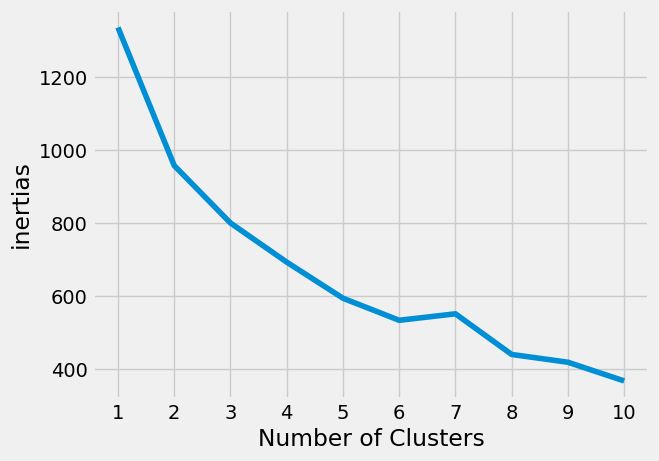

In [79]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), inertias)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("inertias")
plt.show()

In [80]:
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

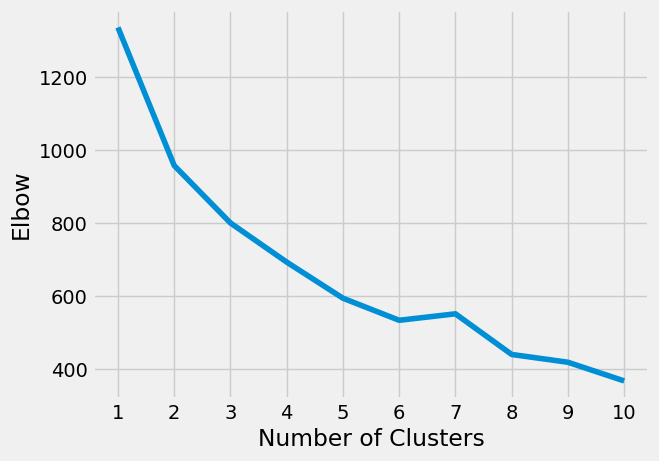

In [81]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Elbow")
plt.show()

In [82]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

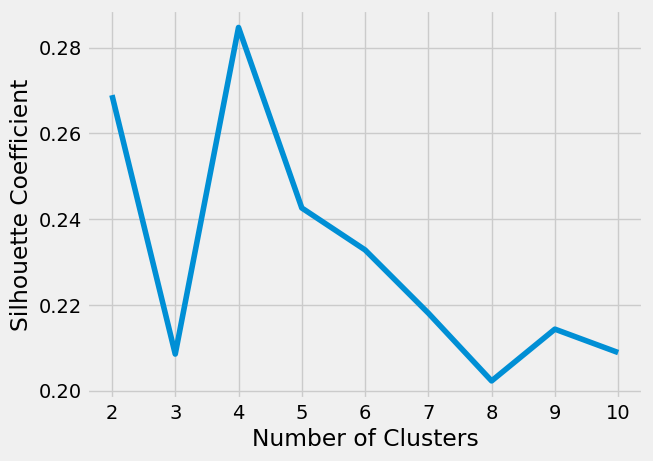

In [83]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [84]:
calinski_harabasz = []
for k in range(2,11):
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = calinski_harabasz_score(X, kmeans.labels_)
    calinski_harabasz.append(score)

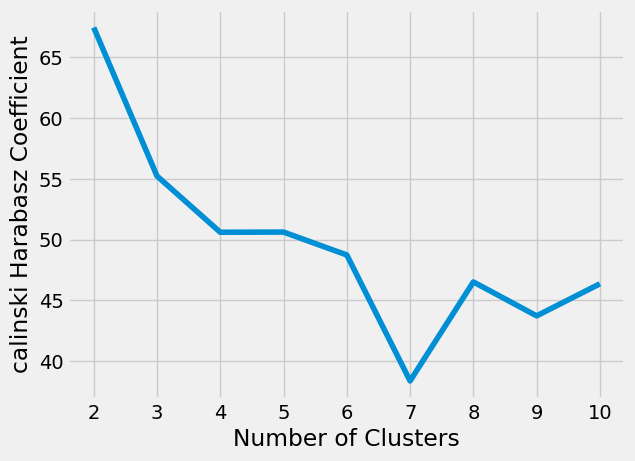

In [87]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), calinski_harabasz)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("calinski Harabasz Coefficient")
plt.show()

Finding the optimal number of clusters for Mini-Batch K-Means follows similar principles as standard K-Means. Here are the best methods:
1. Elbow Method (WCSS)
- Compute the Within-Cluster Sum of Squares (WCSS) for different values of K.
- Plot WCSS vs. K and look for the elbow point, where the rate of decrease slows.

2. Silhouette Score
- Measures how well-separated clusters are.
- Compute the silhouette score for different values of K.
- The optimal K is where the silhouette score is highest.

3. Davies-Bouldin Index
- Measures cluster compactness and separation.
- Lower values indicate better clustering.

4. Gap Statistic
- Compares clustering performance against a random distribution.
- A higher gap value suggests a better clustering solution.

Key Takeaways
- Use the Elbow Method to find the WCSS elbow point.
- Use Silhouette Score to find well-separated clusters.
- Use Davies-Bouldin Index to ensure compact and distinct clusters.
- Combine multiple techniques for a robust clustering decision.

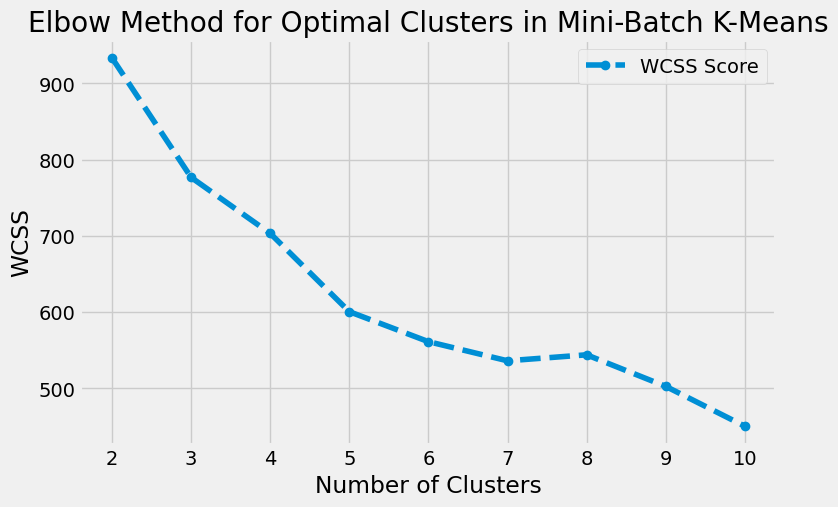

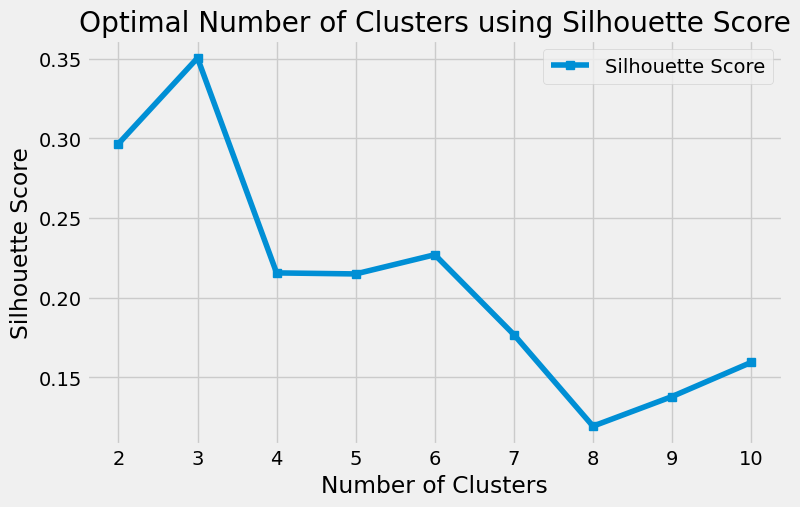

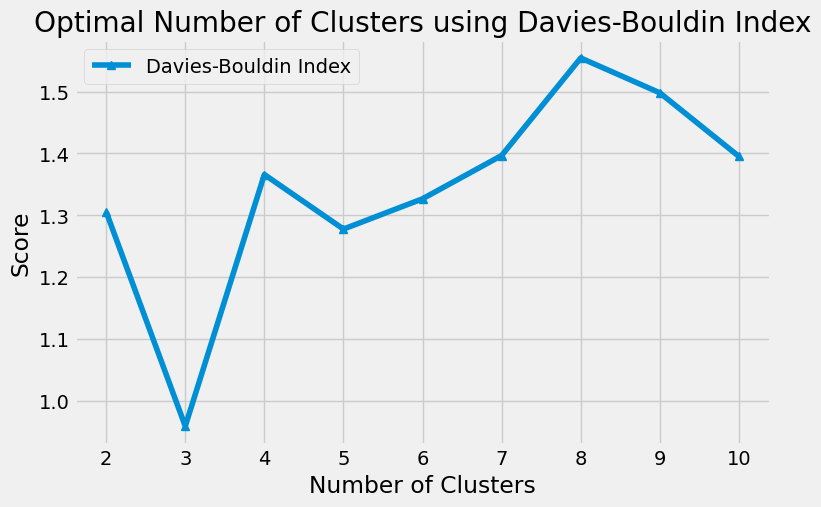

Optimal number of clusters based on Elbow Score: 2
Optimal number of clusters based on Silhouette Score: 3
Optimal number of clusters based on davies_bouldin Score: 8


In [88]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Test different values of K
range_n_clusters = range(2, 11)
wcss_scores = []
silhouette_scores = []
davies_bouldin_scores = []

for k in range_n_clusters:
    kmeans = MiniBatchKMeans(n_clusters=k, batch_size=50, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    
    wcss_scores.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, cluster_labels))
    davies_bouldin_scores.append(davies_bouldin_score(X, cluster_labels))

# Plot WCSS (Elbow Method)
plt.figure(figsize=(8,5))
plt.plot(range_n_clusters, wcss_scores, marker='o', linestyle='--', label="WCSS Score")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal Clusters in Mini-Batch K-Means")
plt.legend()
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(8,5))
plt.plot(range_n_clusters, silhouette_scores, marker='s', linestyle='-', label="Silhouette Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Optimal Number of Clusters using Silhouette Score")
plt.legend()
plt.show()

# Plot Davies-Bouldin Scores
plt.figure(figsize=(8,5))
plt.plot(range_n_clusters, davies_bouldin_scores, marker='^', linestyle='-', label="Davies-Bouldin Index")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.title("Optimal Number of Clusters using Davies-Bouldin Index")
plt.legend()
plt.show()

# Find the best number of clusters based on silhouette score
best_k_em = range_n_clusters[np.argmax(wcss_scores)]
print(f"Optimal number of clusters based on Elbow Score: {best_k_em}")

best_k_ss = range_n_clusters[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on Silhouette Score: {best_k_ss}")

best_k_dbs = range_n_clusters[np.argmax(davies_bouldin_scores)]
print(f"Optimal number of clusters based on davies_bouldin Score: {best_k_dbs}")

Silhouette Score (Initial K=3): 0.3504413458953165
Davies-Bouldin Index (Initial K=3): 0.9592247940473624

Cluster Characteristics (Mean Values):
         child_mort     exports    health     imports        income  \
Cluster                                                               
0         15.703571   43.487500  7.069464   46.143750  22069.285714   
1          4.133333  176.000000  6.793333  156.666667  64033.333333   
2         88.844231   28.203827  6.270385   42.164729   3832.750000   

         inflation  life_expec  total_fer          gdpp  
Cluster                                                  
0          6.04292   75.215179   2.119821  16937.535714  
1          2.46800   81.433333   1.380000  57566.666667  
2         11.83375   59.892308   4.822115   1832.884615  

Countries needing the most aid based on Mini-Batch K-Means clustering:
0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25      

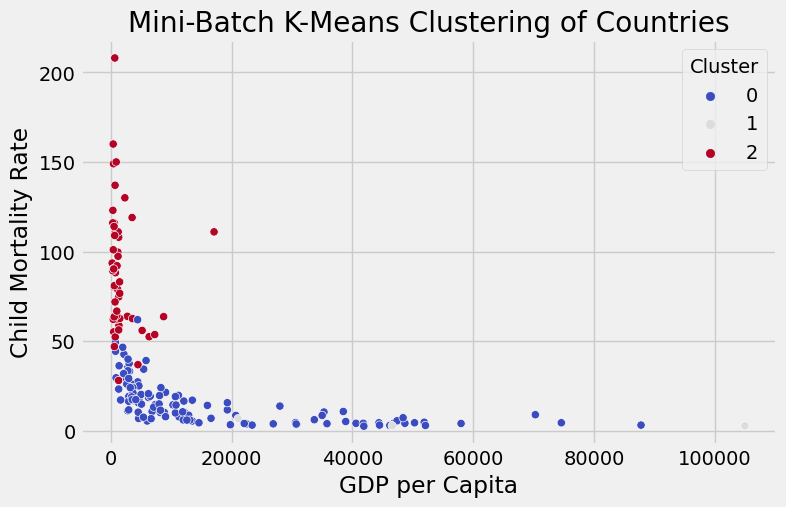

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Apply Mini-Batch K-Means clustering with an initial guess for K (default = 3)
initial_k = 3
mini_batch_kmeans = MiniBatchKMeans(n_clusters=initial_k, batch_size=50, random_state=42)
df['Cluster'] = mini_batch_kmeans.fit_predict(X)

# Compute Silhouette Score for validation
silhouette_avg = silhouette_score(X, df['Cluster'])
print(f"Silhouette Score (Initial K={initial_k}): {silhouette_avg}")

# Compute Davies-Bouldin Index for validation
davies_bouldin = davies_bouldin_score(X, df['Cluster'])
print(f"Davies-Bouldin Index (Initial K={initial_k}): {davies_bouldin}")

# Analyze cluster characteristics
print("\nCluster Characteristics (Mean Values):")
print(df.groupby('Cluster').mean())

# Identify the cluster representing the most vulnerable countries (lowest GDP per capita, highest child mortality)
cluster_vulnerable = df.groupby('Cluster').mean().idxmin()

# Extract countries in the most vulnerable cluster
vulnerable_countries = df[df['Cluster'] == cluster_vulnerable['gdpp']]['country']

print("\nCountries needing the most aid based on Mini-Batch K-Means clustering:")
print(vulnerable_countries)

# Visualize clusters using a scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['gdpp'], y=df['child_mort'], hue=df['Cluster'], palette='coolwarm')
plt.xlabel("GDP per Capita")
plt.ylabel("Child Mortality Rate")
plt.title("Mini-Batch K-Means Clustering of Countries")
plt.show()

# Gaussian Mixture Model (GMM) <a id="gmm"></a>
[Back to Top](#top)

The Gaussian Mixture Model (GMM) is a probabilistic model used for clustering and density estimation. It assumes that the data is generated from a mixture of several Gaussian components, each representing a distinct cluster. GMM assigns probabilities to data points, allowing them to belong to multiple clusters simultaneously

Key Differences Between GMM & K-Means
- GMM provides probabilistic clustering (instead of rigid assignments like K-Means).
- Handles non-spherical clusters (clusters can take different shapes based on covariance).
- Uses BIC/AIC for optimal cluster selection, whereas K-Means uses the Elbow Method.
- Suitable for overlapping data distributions, making it more flexible than K-Means.

In [90]:
from sklearn.mixture import GaussianMixture

In [91]:
# Determine the optimal number of clusters using Bayesian Information Criterion (BIC)
bic_scores = []
aic_scores = []
silhouette_scores = []
# n_clusters_range = range(2, 10)

for k in range(2,11):
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
    gmm.fit(X)
    bic_scores.append(gmm.bic(X))
    aic_scores.append(gmm.aic(X))
    
    cluster_labels = gmm.predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

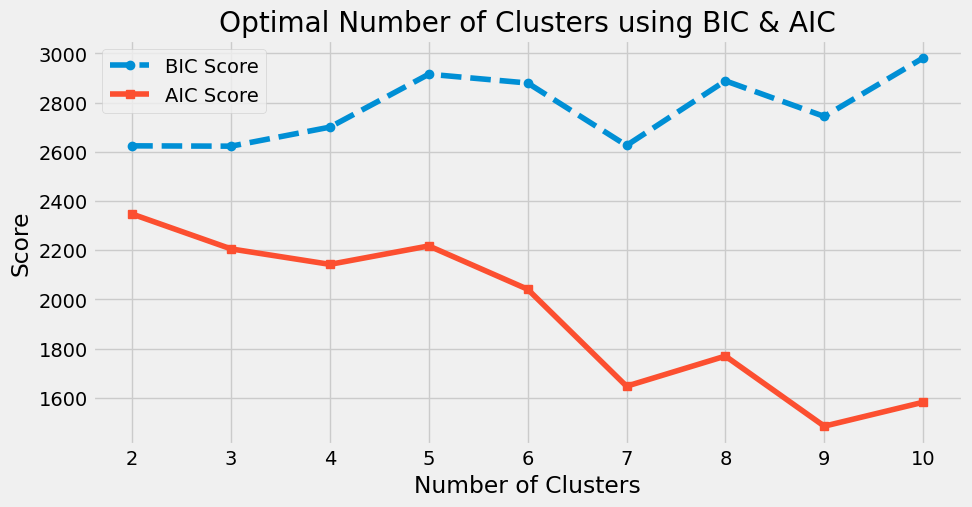

In [92]:
# Plot BIC and AIC scores to find the best number of clusters
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), bic_scores, marker='o', linestyle='--', label='BIC Score')
plt.plot(range(2, 11), aic_scores, marker='s', linestyle='-', label='AIC Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Optimal Number of Clusters using BIC & AIC')
plt.legend()
plt.show()

In [93]:
n_clusters_range = range(2, 11)

# Select the optimal number of clusters based on the lowest BIC
optimal_clusters = n_clusters_range[np.argmin(bic_scores)]
print(f"Optimal number of clusters based on BIC: {optimal_clusters}")

# Fit GMM with the optimal number of clusters
gmm = GaussianMixture(n_components=optimal_clusters, covariance_type='full', random_state=42)
df['Cluster'] = gmm.fit_predict(X)

# Analyze cluster characteristics
print("\nCluster Characteristics (Mean Values):")
print(df.groupby('Cluster').mean())

# Identify the cluster with the most vulnerable countries (e.g., lowest GDP per capita, highest child mortality)
cluster_vulnerable = df.groupby('Cluster').mean().idxmin()

# Extract countries in the most vulnerable cluster
vulnerable_countries = df[df['Cluster'] == cluster_vulnerable['gdpp']]['country']

print("\nCountries that need the most aid based on Gaussian Mixture Model clustering:")
print(vulnerable_countries)

Optimal number of clusters based on BIC: 3

Cluster Characteristics (Mean Values):
         child_mort    exports    health    imports        income  inflation  \
Cluster                                                                        
0          5.530000  57.557500  8.570750  50.662500  43923.000000   3.276900   
1         81.171930  29.473860  6.504737  44.836842   4254.964912  12.544825   
2         22.044286  41.184129  6.066000  46.406656  12338.714286   6.477643   

         life_expec  total_fer          gdpp  
Cluster                                       
0         79.595000   1.755000  39212.750000  
1         60.852632   4.682807   2207.017544  
2         73.291429   2.217000   6724.342857  

Countries that need the most aid based on Gaussian Mixture Model clustering:
0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28         

# Gaussian Mixture Model (GMM) with Different Covariance Type

GMM supports four different covariance types, which influence the shape and flexibility of clusters:

<style>
.demo { border:1px solid #C0C0C0; border-collapse:collapse; padding:5px; }
.demo th { border:1px solid #C0C0C0; padding:5px; background:#F0F0F0;}
.demo td { border:1px solid #C0C0C0; padding:5px;}
</style>

<table class="demo">
<thead>
    <tr>
        <th>Covariance Type</th>
        <th>Description</th>
        <th>Best Use Case</th>
    </tr>
    </thead>
    <tbody>
    <tr>
        <td>full</td>
        <td>Each cluster has its own general covariance matrix, allowing elliptical shapes with any orientation.</td>
        <td>Most flexible, suitable for complex, irregular data distributions.</td>
    </tr>
    <tr>
        <td>tied</td>
        <td>All clusters share the same covariance matrix, restricting the cluster shapes to be identical.</td>
        <td>Useful when clusters have similar characteristics.</td>
    </tr>
    <tr>
        <td>diag</td>
        <td>Each cluster has its own diagonal covariance matrix (uncorrelated features).</td>
        <td>Works well when features are relatively independent.</td>
    </tr>
    <tr>
        <td>spherical</td>
        <td>Each cluster has a single variance value, producing circular-shaped clusters.</td>
        <td>Fastest computation, best for clusters of uniform size and shape.</td>
    </tr>        
    </tbody>
</table>

How This Solution Works
- Tests all four covariance types to determine which fits the data best.
- Uses BIC score to find the optimal number of clusters and covariance type.
- Provides flexibility in cluster shapes, allowing better classification of countries.
- Identifies countries needing the most aid, ensuring strategic resource allocation.

Ref: https://www.kaggle.com/code/cuecacuela/2025-the-ultimate-markdown-cheat-sheet#7.1-Ordered-lists

In [94]:
# Test different covariance types and determine the best
covariance_types = ['spherical', 'diag', 'tied', 'full']
bic_scores = {cov_type: [] for cov_type in covariance_types}

n_clusters_range = range(2, 11)

for cov_type in covariance_types:
    for n_clusters in n_clusters_range:
        gmm = GaussianMixture(n_components=n_clusters, covariance_type=cov_type, random_state=42)
        gmm.fit(X)
        bic_scores[cov_type].append(gmm.bic(X))

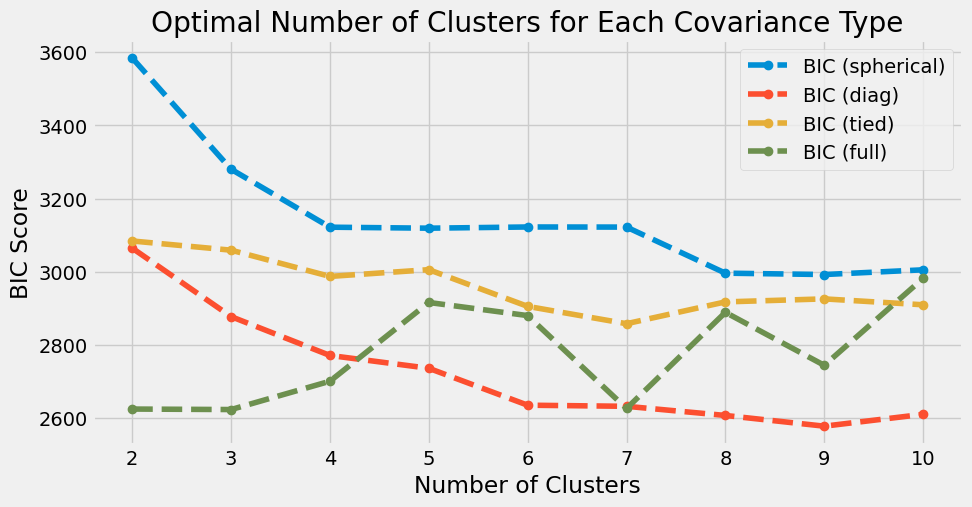

In [95]:
# Plot BIC scores for each covariance type
plt.figure(figsize=(10, 5))
for cov_type in covariance_types:
    plt.plot(n_clusters_range, bic_scores[cov_type], marker='o', linestyle='--', label=f'BIC ({cov_type})')

plt.xlabel('Number of Clusters')
plt.ylabel('BIC Score')
plt.title('Optimal Number of Clusters for Each Covariance Type')
plt.legend()
plt.show()

In [96]:
# Select the best covariance type and number of clusters based on the lowest BIC score
best_covariance_type = min(bic_scores, key=lambda x: min(bic_scores[x]))
optimal_clusters = n_clusters_range[np.argmin(bic_scores[best_covariance_type])]

print(f"Best Covariance Type: {best_covariance_type}")
print(f"Optimal Number of Clusters: {optimal_clusters}")

# Fit GMM with the best covariance type and number of clusters
gmm = GaussianMixture(n_components=optimal_clusters, covariance_type=best_covariance_type, random_state=42)
df['Cluster'] = gmm.fit_predict(X)

# Analyze cluster characteristics
print("\nCluster Characteristics (Mean Values):")
print(df.groupby('Cluster').mean())

# Identify the cluster with the most vulnerable countries (e.g., lowest GDP per capita, highest child mortality)
cluster_vulnerable = df.groupby('Cluster').mean().idxmin()

# Extract countries in the most vulnerable cluster
vulnerable_countries = df[df['Cluster'] == cluster_vulnerable['gdpp']]['country']

print("\nCountries that need the most aid based on Gaussian Mixture Model clustering:")
print(vulnerable_countries)

Best Covariance Type: diag
Optimal Number of Clusters: 9

Cluster Characteristics (Mean Values):
         child_mort     exports     health     imports        income  \
Cluster                                                                
0         53.433333   35.433762   6.890952   57.679329   4758.571429   
1        100.196774   22.358387   6.419677   38.229032   1697.516129   
2         54.409091   57.063636   4.015455   41.963636  19318.181818   
3        130.000000   25.300000   5.070000   17.400000   5150.000000   
4          4.219231   42.334615  10.158462   40.242308  39196.153846   
5         10.258621   51.572414   7.245172   56.996552  17274.137931   
6         24.182500   32.677000   5.868500   39.735000  10032.750000   
7          9.500000   68.720000   3.182000   39.340000  75900.000000   
8          4.133333  176.000000   6.793333  156.666667  64033.333333   

          inflation  life_expec  total_fer          gdpp  
Cluster                                            

# Hierarchical clustering <a id="hm"></a>
[Back to Top](#top)

Hierarchical clustering is useful when we want to visualize relationships between clusters in a tree-like structure (dendrogram).

Steps in the Solution
- Load and preprocess the dataset (handle missing values, normalize data).
- Apply hierarchical clustering using Agglomerative Clustering.
- Visualize cluster relationships using a dendrogram.
- Determine the optimal number of clusters using linkage methods.
- Analyze clusters to identify countries in urgent need of aid.

Key Differences Between Hierarchical Clustering & K-Means
- Doesn't require pre-defining the number of clusters (K-Means requires K).
- Provides a hierarchical structure (dendrogram), which helps visualize relationships between clusters.
- More interpretable, making it easier to identify the most vulnerable group.
- Suitable for smaller datasets, since it doesn't require multiple iterations like K-Means.

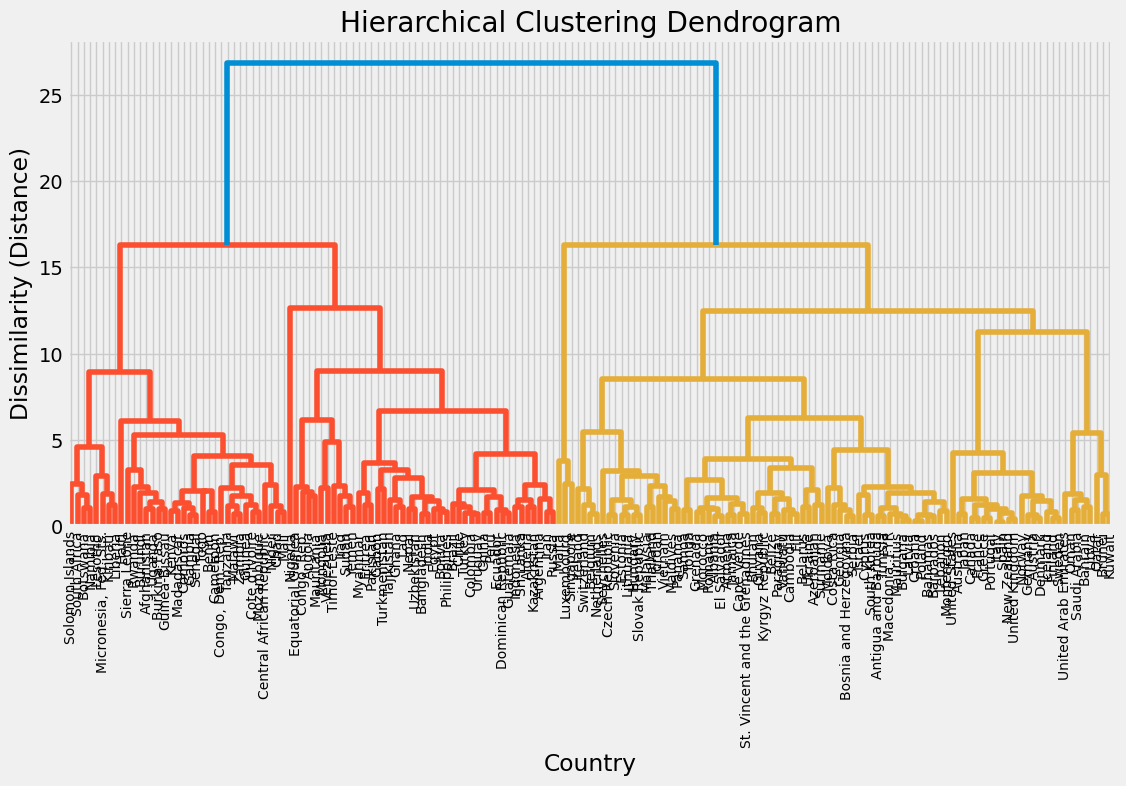

In [97]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Perform hierarchical clustering using different linkage methods
linkage_method = 'ward'  # Options: 'single', 'complete', 'average', 'ward'
Z = linkage(X, method=linkage_method)

country_names = df['country']

# Plot the Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, labels=country_names.tolist(), leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Country")
plt.ylabel("Dissimilarity (Distance)")
plt.show()

Determining the optimal number of clusters from a dendrogram in hierarchical clustering involves analyzing the vertical distances between merged clusters and identifying a natural cut-off point.
Methods to Determine the Optimal Number of Clusters
1. Visual Inspection (Largest Vertical Gap)
- Look for the largest vertical distance between two merged clusters in the dendrogram.
- Draw a horizontal line across the dendrogram at a level where the largest gap exists.
- Count the number of vertical lines intersected by the horizontal line—this represents the number of clusters.

2. Inconsistency Coefficient Method
- The inconsistency coefficient measures how different a cluster merge is compared to previous merges.
- A high inconsistency value suggests a natural cluster boundary.
- Use Scipy’s inconsistent() function to compute this.

3. Distance Threshold Method
- Set a distance threshold based on domain knowledge or statistical analysis.
- Cut the dendrogram at this threshold to define clusters.

4. Gap Statistic
- The gap statistic compares clustering performance against a random distribution.
- A higher gap value suggests a better clustering solution.

5. Silhouette Score
- Compute the silhouette score for different cluster numbers.
- The optimal number of clusters is where the silhouette score is highest.

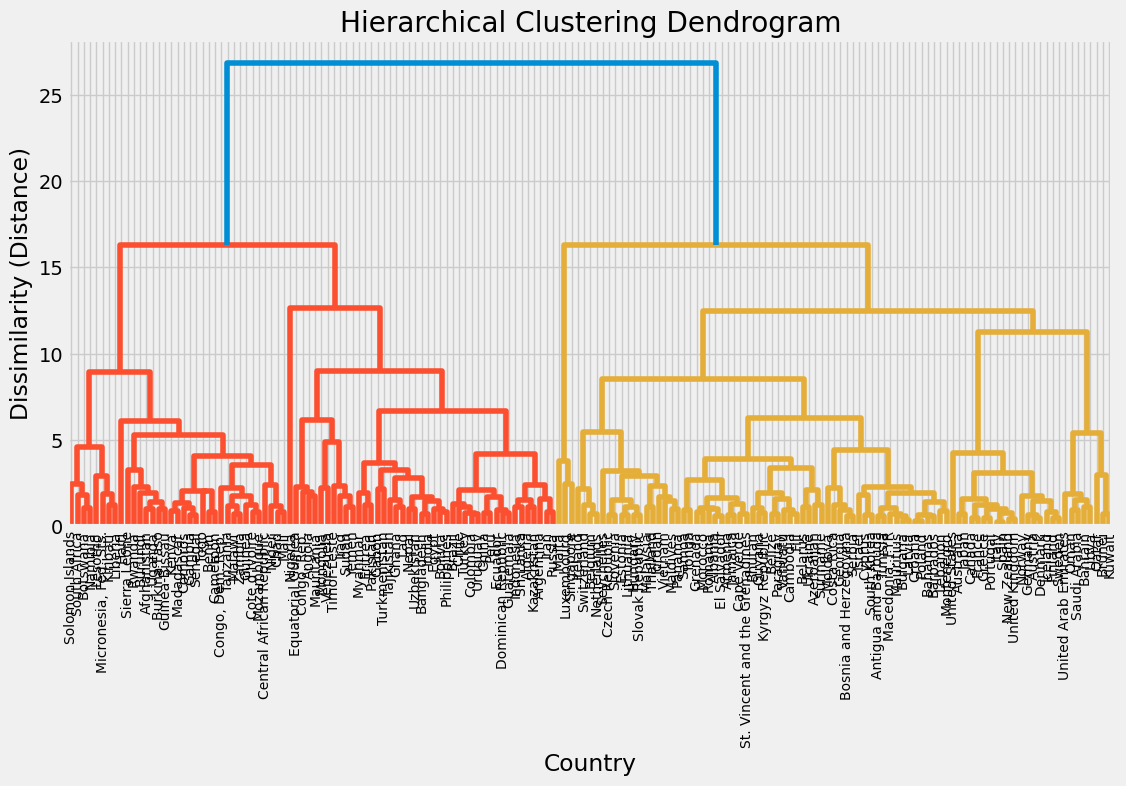

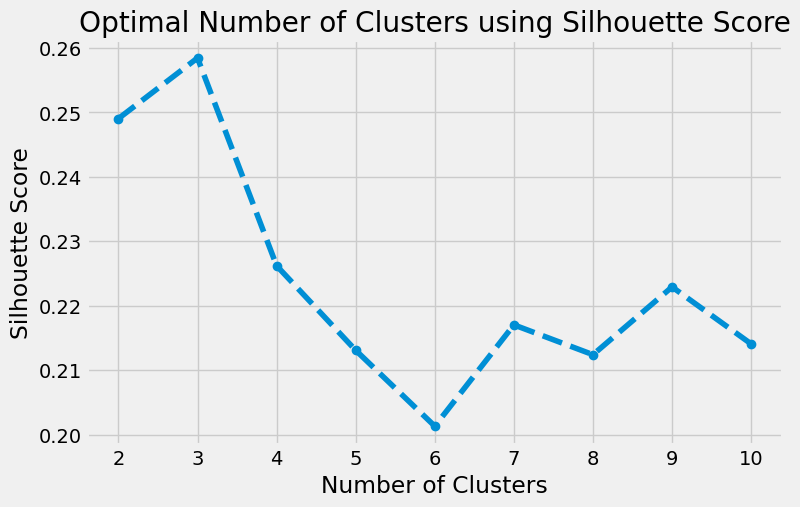

Optimal number of clusters based on silhouette score: 3


In [98]:
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score

# Perform hierarchical clustering
linkage_method = 'ward'  # Options: 'single', 'complete', 'average', 'ward'
Z = sch.linkage(X, method=linkage_method)

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(Z, labels=country_names.tolist(), leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Country")
plt.ylabel("Dissimilarity (Distance)")
plt.show()

# Determine optimal clusters using fcluster (distance threshold method)
optimal_clusters = sch.fcluster(Z, t=10, criterion='distance')  # Adjust 't' based on dendrogram observation

# Compute silhouette scores for different cluster numbers
silhouette_scores = []
for k in range(2, 11):
    labels = sch.fcluster(Z, k, criterion='maxclust')
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Optimal Number of Clusters using Silhouette Score")
plt.show()

# Find the best number of clusters based on silhouette score
best_k = np.argmax(silhouette_scores) + 2
print(f"Optimal number of clusters based on silhouette score: {best_k}")

Key Takeaways
- Look for the largest vertical gap in the dendrogram.
- Use silhouette scores to validate the best cluster count.
- Apply distance threshold methods for automatic cluster selection.
- Combine multiple techniques for a robust clustering decision.

In [99]:
# Determine the optimal number of clusters
optimal_clusters = 2  # Choose based on dendrogram split

# Apply Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=optimal_clusters, linkage=linkage_method)
df['Cluster'] = hc.fit_predict(X)

# Analyze cluster characteristics
print("\nCluster Characteristics (Mean Values):")
print(df.groupby('Cluster').mean())

# Identify the cluster with the most vulnerable countries (e.g., lowest GDP per capita, highest child mortality)
cluster_vulnerable = df.groupby('Cluster').mean().idxmin()

# Extract countries in the most vulnerable cluster
vulnerable_countries = df[df['Cluster'] == cluster_vulnerable['gdpp']]['country']

print("\nCountries that need the most aid based on hierarchical clustering:")
print(vulnerable_countries)


Cluster Characteristics (Mean Values):
         child_mort    exports    health    imports        income  inflation  \
Cluster                                                                        
0         12.223596  52.113483  7.403933  54.643820  26551.460674   4.019225   
1         67.989744  28.552551  6.144487  38.043153   6411.320513  12.075064   

         life_expec  total_fer          gdpp  
Cluster                                       
0         76.124719   1.993034  21516.359551  
1         64.201282   4.037564   3205.871795  

Countries that need the most aid based on hierarchical clustering:
0      Afghanistan
2          Algeria
3           Angola
5        Argentina
12      Bangladesh
          ...     
160        Uruguay
161     Uzbekistan
163      Venezuela
165          Yemen
166         Zambia
Name: country, Length: 78, dtype: object


# DBScan Model <a id="dbscan"></a>
[Back to Top](#top)

Instead of K-Means, Gaussian Mixture Models (GMM), or Hierarchical Clustering, we can use DBSCAN (Density-Based Spatial Clustering of Applications with Noise) to categorize countries based on their socio-economic and health indicators from Country-data.csv.

Why Use DBSCAN Instead of K-Means or GMM?
- No need to specify the number of clusters (K in K-Means).
- Detects irregular-shaped clusters (K-Means assumes spherical clusters).
- Handles outliers effectively (marks low-density points as noise instead of forcing them into clusters).
- Great for imbalanced data, where some clusters are densely packed while others are sparse.

Steps in the Solution
- Load and preprocess the dataset (handle missing values, normalize data).
- Apply DBSCAN clustering using epsilon (eps) and minimum points (min_samples).
- Identify optimal parameters using Nearest Neighbor Distance Plot.
- Analyze clusters to find countries in urgent need of aid.

DBSCAN algorithm needs two crucial hyperparameters:

1. eps: This parameter sets the neighborhood radius around a data point. If the distance between two points is ≤ 'eps', they're neighbors. Choosing a small eps marks a lot of data as outliers; a large eps merges clusters, stuffing most data in the same cluster. To find eps, 👀 at the k-distance graph.

2. MinPts: It's the minimum neighbors within eps. For big datasets, go for a high MinPts, where MinPts >= D+1 (D is the dimensions). A basic rule: MinPts >= 2 * D is for small or noisy data, yet always keep MinPts at least 3.

Assigning values for these hyperparameters isn't arbitrary:

1. MinPts: For D dimensions, choose minPts >= D + 1. Commonly, go for minPts >= 2 * D for small or noisy datasets.
2. eps: Its value is often figured out via a k-distance graph from the KNN model. Choose the abrupt change point in the graph.

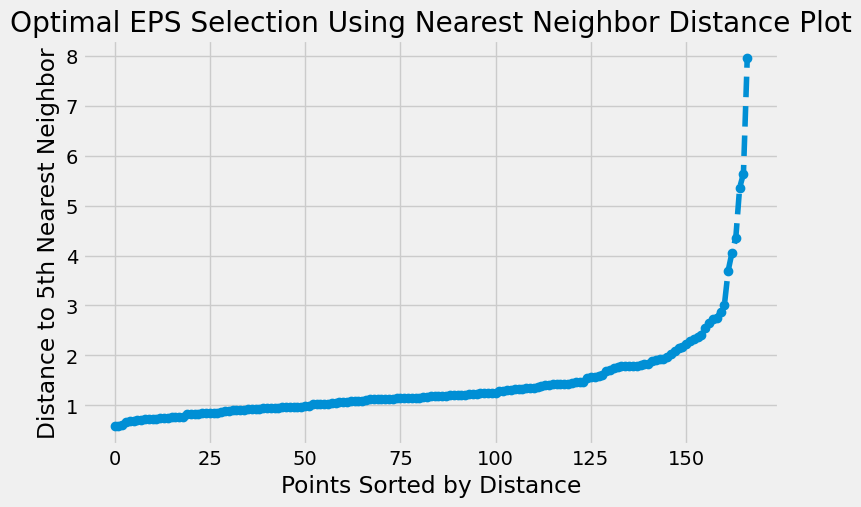


Cluster Characteristics (Mean Values):
         child_mort     exports    health     imports        income  \
Cluster                                                               
-1        70.080000  113.720000  6.472000  110.420000  39750.000000   
 0        37.288272   38.867895  6.826296   44.929419  16446.993827   

         inflation  life_expec  total_fer          gdpp  
Cluster                                                  
-1       23.370800   67.380000    2.66200  35138.400000  
 0        7.300691   70.653704    2.95679  12279.765432  

Countries needing the most aid based on DBSCAN clustering:
0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 162, dtype: object


In [100]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Determine optimal epsilon (eps) using Nearest Neighbor Distance Plot
nearest_neighbors = NearestNeighbors(n_neighbors=5)
nearest_neighbors.fit(X)
distances, indices = nearest_neighbors.kneighbors(X)

# Sort distances for elbow detection
distances = np.sort(distances[:, 4])  
plt.figure(figsize=(8, 5))
plt.plot(distances, marker='o', linestyle='--')
plt.xlabel("Points Sorted by Distance")
plt.ylabel("Distance to 5th Nearest Neighbor")
plt.title("Optimal EPS Selection Using Nearest Neighbor Distance Plot")
plt.show()

# Choose eps (adjust based on elbow point in plot)
eps_value = distances[int(len(distances) * 0.95)]  # Using 95th percentile heuristic

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=eps_value, min_samples=5)
df['Cluster'] = dbscan.fit_predict(X)

# Analyze cluster characteristics
print("\nCluster Characteristics (Mean Values):")
print(df.groupby('Cluster').mean())

# Identify the cluster representing the most vulnerable countries (exclude noise points labeled as -1)
cluster_vulnerable = df.groupby('Cluster').mean().idxmin()

# Extract countries in the most vulnerable cluster
vulnerable_countries = df[df['Cluster'] == cluster_vulnerable['gdpp']]['country']

print("\nCountries needing the most aid based on DBSCAN clustering:")
print(vulnerable_countries)

# Mean Shift Model <a id="ms"></a>
[Back to Top](#top)

We can use the Mean Shift algorithm to categorize countries based on their socio-economic and health indicators from Country-data.csv. Mean Shift clustering is a non-parametric method that automatically determines the number of clusters by finding dense areas in the data.

Why Use Mean Shift Instead of K-Means or DBSCAN?
- No need to specify the number of clusters (K in K-Means).
- Adapts dynamically to data distribution, identifying high-density regions.
- Useful for non-uniform data, adjusting cluster sizes based on point density.
- Handles noisy data effectively, unlike K-Means which forces every point into a cluster.

Steps in the Solution
- Load and preprocess the dataset (handle missing values, normalize data).
- Apply the Mean Shift clustering algorithm using a Gaussian kernel density estimate.
- Determine the optimal bandwidth (cluster radius) using Scikit-learn's estimate_bandwidth().
- Analyze clusters to find countries in urgent need of aid.

Mean Shift algorithm utilizes a kernel function - generally a Gaussian kernel - to estimate data point density around a specific point. This function determines the impact of each data point based on its distance from the current point.

Data and Feature Spaces: The algorithm functions in both the data space (where data points are located) and the feature space (a transformed space that aids in simplifying computations)

Bandwidth Determination: It is essential to choose an appropriate bandwidth before implementing the Mean Shift algorithm. The bandwidth dictates the search area for the mode. A small bandwidth increases sensitivity to local fluctuations, whereas a large bandwidth leads to a smoother density estimation.


Cluster Characteristics (Mean Values):
         child_mort     exports     health     imports        income  \
Cluster                                                                
0         33.774667   39.308660   6.782867   45.517106  15245.473333   
1        142.587500   22.500000   7.282500   48.700000   1499.000000   
2        130.000000   25.300000   5.070000   17.400000   5150.000000   
3         10.100000   65.466667   2.426667   27.400000  93600.000000   
4          5.750000   19.600000  14.900000   21.950000  43150.000000   
5          6.800000  153.000000   8.650000  154.000000  28300.000000   
6          2.800000  200.000000   3.960000  174.000000  72100.000000   
7          2.800000  175.000000   7.770000  142.000000  91700.000000   

          inflation  life_expec  total_fer           gdpp  
Cluster                                                    
0          7.372813   71.144000   2.863533   11678.046667  
1          5.636250   51.437500   5.340000     647.125000  

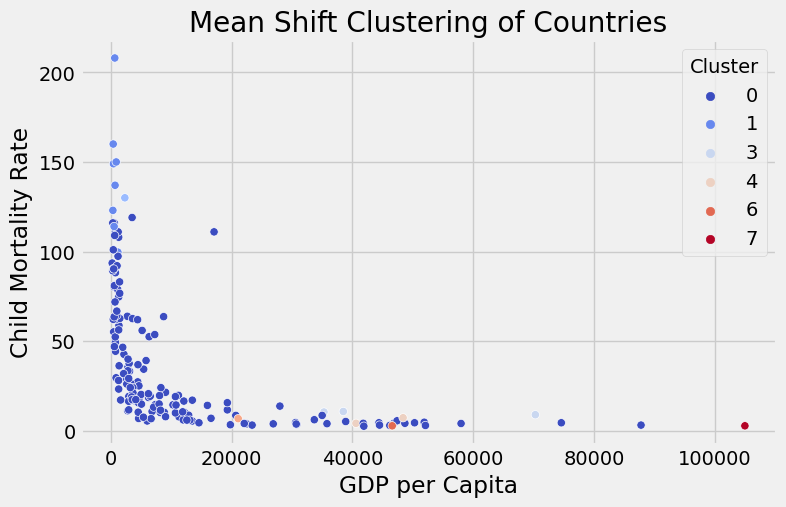

In [101]:
import seaborn as sns
from sklearn.cluster import MeanShift, estimate_bandwidth

# Estimate optimal bandwidth (determines cluster radius)
bandwidth = estimate_bandwidth(X, quantile=0.2)  # Adjust quantile based on data distribution

# Apply Mean Shift clustering
mean_shift = MeanShift(bandwidth=bandwidth)
df['Cluster'] = mean_shift.fit_predict(X)

# Analyze cluster characteristics
print("\nCluster Characteristics (Mean Values):")
print(df.groupby('Cluster').mean())

# Identify the cluster representing the most vulnerable countries (lowest GDP per capita, highest child mortality)
cluster_vulnerable = df.groupby('Cluster').mean().idxmin()

# Extract countries in the most vulnerable cluster
vulnerable_countries = df[df['Cluster'] == cluster_vulnerable['gdpp']]['country']

print("\nCountries needing the most aid based on Mean Shift clustering:")
print(vulnerable_countries)

# Visualize clusters using a scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['gdpp'], y=df['child_mort'], hue=df['Cluster'], palette='coolwarm')
plt.xlabel("GDP per Capita")
plt.ylabel("Child Mortality Rate")
plt.title("Mean Shift Clustering of Countries")
plt.show()

# Birch Model <a id="birch"></a>
[Back to Top](#top)

Certainly! Instead of K-Means, DBSCAN, GMM, Hierarchical Clustering, or Mean Shift, we can use BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies) to categorize countries based on socio-economic and health indicators from Country-data.csv. BIRCH is particularly useful for large datasets and provides efficient clustering with low memory consumption.

Why Use BIRCH Instead of K-Means or DBSCAN?
- Handles large datasets efficiently using a compact clustering feature tree.
- Incremental learning, meaning new data points can be added dynamically.
- Fast execution with low memory usage, unlike traditional hierarchical clustering.
- Can detect both dense and sparse clusters, making it more adaptable than K-Means.

Steps in the Solution
- Load and preprocess the dataset (handle missing values, normalize data).
- Apply the BIRCH clustering algorithm with different branching_factor values.
- Analyze clusters to find countries in urgent need of aid.

The Balance Iterative Reducing and Clustering using Hierarchies (BIRCH) algorithm shines when handling vast amounts of data compared to the k-means algorithm. Instead of dealing directly with individual data points, BIRCH chops the data into compact summaries that are then clustered. These summaries encapsulate as much distribution info as possible from the data points, enhancing the algorithm's effectiveness.

BIRCH is often paired with other clustering algorithms because these techniques can operate on the summaries produced by BIRCH. While BIRCH is a potent tool, it comes with a limitation: it exclusively processes numeric data values. Categorical values would require preprocessing before being fed into the algorithm to ensure accurate results.

Finding the optimal number of clusters in BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies) can be done using different techniques. Since BIRCH can automatically determine clusters, you can either let it decide or manually specify n_clusters based on evaluation metrics.
Methods to Determine the Optimal Number of Clusters in BIRCH
1. Using n_clusters=None (Automatic Clustering)
- BIRCH automatically determines clusters based on the threshold and branching factor.
- If the dataset has natural density variations, this method works well.
- However, it may over-cluster or under-cluster depending on the dataset.

2. Using the Elbow Method (WCSS)
- Run BIRCH with different values of n_clusters (e.g., 2 to 10).
- Compute the Within-Cluster Sum of Squares (WCSS) for each value.
- Plot WCSS vs. n_clusters and look for the elbow point where the rate of decrease slows.

3. Using Silhouette Score
- Compute the silhouette score for different values of n_clusters.
- The optimal number of clusters is where the silhouette score is highest.
- This ensures well-separated clusters.

4. Using Davies-Bouldin Index
- Lower Davies-Bouldin Index values indicate better clustering.
- Run BIRCH with different n_clusters and choose the lowest Davies-Bouldin score.

5. Using Gap Statistic
- Compares clustering performance against a random distribution.
- A higher gap value suggests a better clustering solution.

In [104]:
# !pip install yellowbrick

The KElbowVisualizer implements the “elbow” method to help data scientists select the optimal number of clusters by fitting the model with a range of values for 
. If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point.


Cluster Characteristics (Mean Values):
         child_mort    exports    health    imports        income  inflation  \
Cluster                                                                        
0         17.600000  26.700000  5.253333  47.833333   8210.000000   7.356667   
1         27.300000  38.400000  4.170000  31.400000  12900.000000  16.100000   
2         11.714286  46.671429  6.558571  57.542857  15242.857143   1.280857   
3         14.500000  18.900000  8.100000  16.000000  18700.000000  20.900000   
4          3.950000  21.375000  9.322500  22.125000  36475.000000  -0.065250   
...             ...        ...       ...        ...           ...        ...   
107       71.900000  18.700000  6.010000  29.100000   2090.000000   9.250000   
108       62.600000   2.200000  9.120000  27.800000   1850.000000  26.500000   
109       90.300000  40.200000  7.650000  57.300000   1210.000000   1.180000   
110       81.000000  17.100000  9.010000  28.600000   1540.000000  10.600000   


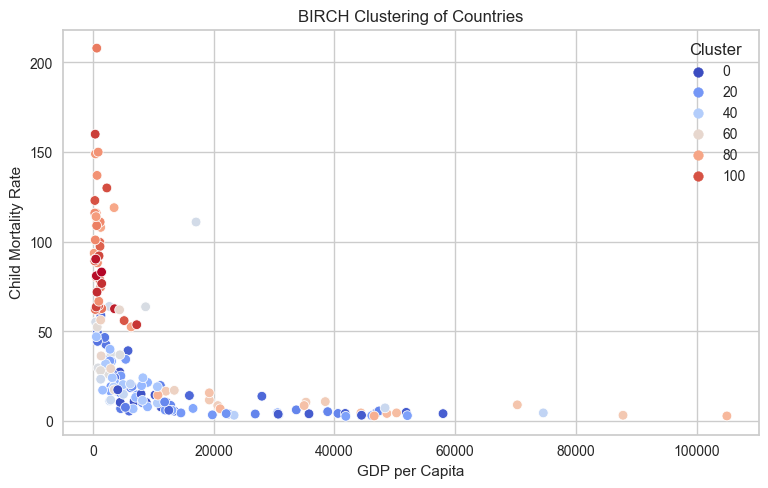

In [105]:
from sklearn.cluster import Birch

# Apply BIRCH clustering
birch = Birch(n_clusters=None, threshold=0.5, branching_factor=50)
df['Cluster'] = birch.fit_predict(X)

# Analyze cluster characteristics
print("\nCluster Characteristics (Mean Values):")
print(df.groupby('Cluster').mean())

# Identify the cluster representing the most vulnerable countries (lowest GDP per capita, highest child mortality)
cluster_vulnerable = df.groupby('Cluster').mean().idxmin()

# Extract countries in the most vulnerable cluster
vulnerable_countries = df[df['Cluster'] == cluster_vulnerable['gdpp']]['country']

print("\nCountries needing the most aid based on BIRCH clustering:")
print(vulnerable_countries)

# Visualize clusters using a scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['gdpp'], y=df['child_mort'], hue=df['Cluster'], palette='coolwarm')
plt.xlabel("GDP per Capita")
plt.ylabel("Child Mortality Rate")
plt.title("BIRCH Clustering of Countries")
plt.show()

Number of Clusters:


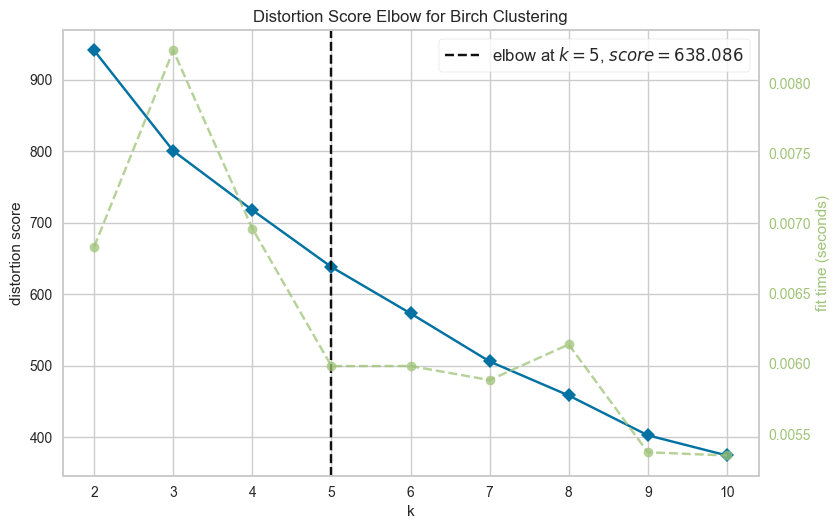

5

In [106]:
# https://stackoverflow.com/questions/69423061/extracting-k-from-yellow-brick-kelbowvisualizer
from yellowbrick.cluster import KElbowVisualizer
print('Number of Clusters:')
Elbow_M = KElbowVisualizer(birch, k=(2, 11))
Elbow_M.fit(X)
Elbow_M.show()
Elbow_M.elbow_value_

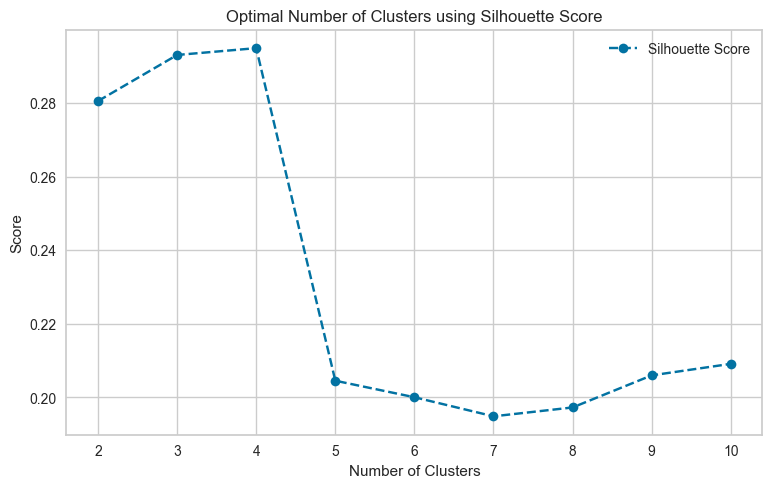

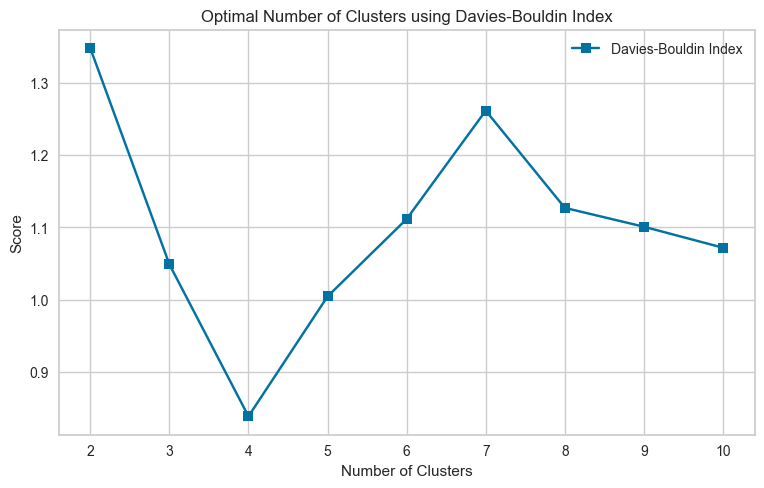

Optimal number of clusters based on silhouette score: 4
Optimal number of clusters based on davies_bouldin score: 2


In [107]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Test different values of n_clusters
range_n_clusters = range(2, 11)
silhouette_scores = []
davies_bouldin_scores = []

for n_clusters in range_n_clusters:
    birch = Birch(n_clusters=n_clusters, threshold=0.5, branching_factor=50)
    cluster_labels = birch.fit_predict(X)
    
    silhouette_scores.append(silhouette_score(X, cluster_labels))
    davies_bouldin_scores.append(davies_bouldin_score(X, cluster_labels))

# Plot Silhouette Scores
plt.figure(figsize=(8,5))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='--', label="Silhouette Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.title("Optimal Number of Clusters using Silhouette Score")
plt.legend()
plt.show()

# Plot Davies-Bouldin Scores
plt.figure(figsize=(8,5))
plt.plot(range_n_clusters, davies_bouldin_scores, marker='s', linestyle='-', label="Davies-Bouldin Index")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.title("Optimal Number of Clusters using Davies-Bouldin Index")
plt.legend()
plt.show()

# Find the best number of clusters based on silhouette score
best_k_ss = range_n_clusters[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on silhouette score: {best_k_ss}")

# Find the best number of clusters based on Davies-Bouldin Scores
best_k_dbs = range_n_clusters[np.argmax(davies_bouldin_scores)]
print(f"Optimal number of clusters based on davies_bouldin score: {best_k_dbs}")

In [108]:
# Apply BIRCH clustering
birch = Birch(n_clusters=best_k_ss, threshold=0.5, branching_factor=50)
df['Cluster'] = birch.fit_predict(X)

# Analyze cluster characteristics
print("\nCluster Characteristics (Mean Values):")
print(df.groupby('Cluster').mean())

# Identify the cluster representing the most vulnerable countries (lowest GDP per capita, highest child mortality)
cluster_vulnerable = df.groupby('Cluster').mean().idxmin()

# Extract countries in the most vulnerable cluster
vulnerable_countries = df[df['Cluster'] == cluster_vulnerable['gdpp']]['country']

print("\nCountries needing the most aid based on BIRCH clustering:")
print(vulnerable_countries)


Cluster Characteristics (Mean Values):
         child_mort     exports    health     imports        income  \
Cluster                                                               
0         69.211842   31.681566  5.905658   43.623236   5266.355263   
1         11.363218   44.874713  7.631494   46.297701  26042.183908   
2          4.133333  176.000000  6.793333  156.666667  64033.333333   
3        130.000000   25.300000  5.070000   17.400000   5150.000000   

          inflation  life_expec  total_fer          gdpp  
Cluster                                                   
0         10.391316   63.057895   4.144737   2492.421053  
1          4.579563   76.845977   1.923333  20696.091954  
2          2.468000   81.433333   1.380000  57566.666667  
3        104.000000   60.500000   5.840000   2330.000000  

Countries needing the most aid based on BIRCH clustering:
113    Nigeria
Name: country, dtype: object


# Affinity Propagation (AP) Model <a id="ap"></a>
[Back to Top](#top)

We can use Affinity Propagation (AP) to categorize countries based on socio-economic and health indicators from Country-data.csv.

Why Use Affinity Propagation Instead of K-Means or DBSCAN?
- Automatically determines the number of clusters (no need to predefine K).
- Assigns "exemplars" (representative points) for each cluster, improving interpretability.
- Useful for datasets with varying densities, avoiding assumptions of spherical clusters.
- Works well with non-uniform data, making it ideal for real-world country classification.

Steps in the Solution
- Load and preprocess the dataset (handle missing values, normalize data).
- Apply the Affinity Propagation algorithm to detect clusters dynamically.
- Analyze cluster results to find countries in urgent need of aid.


Exemplar Countries Representing Clusters:
47              Egypt
82             Kuwait
91         Luxembourg
100         Mauritius
106        Mozambique
113           Nigeria
158    United Kingdom
Name: country, dtype: object

Cluster Characteristics (Mean Values):
         child_mort     exports     health     imports        income  \
Cluster                                                                
0         38.490909   26.535886   5.451591   31.690134   8541.136364   
1         11.050000   64.900000   3.000000   36.666667  71516.666667   
2          4.133333  176.000000   6.793333  156.666667  64033.333333   
3         16.560784   53.964706   6.797255   62.049020  15914.705882   
4        102.494118   30.506471   6.495294   47.208824   3045.088235   
5        130.000000   25.300000   5.070000   17.400000   5150.000000   
6          5.692857   34.482143  10.264286   34.260714  33779.285714   

          inflation  life_expec  total_fer          gdpp  
Cluster                   

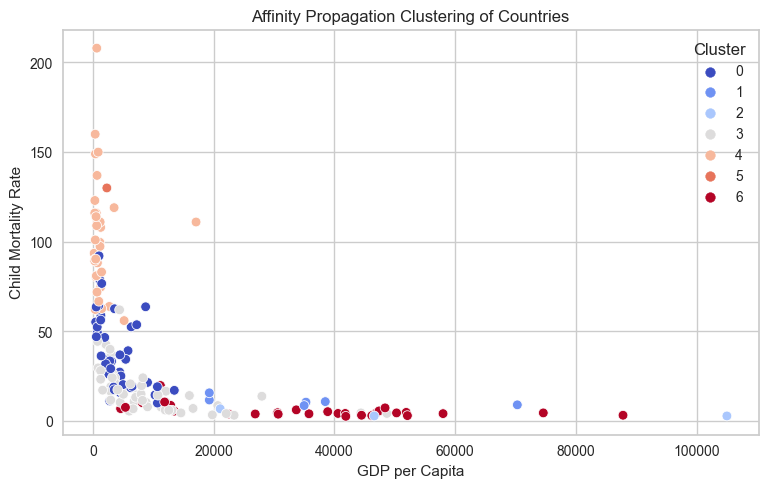

In [109]:
from sklearn.cluster import AffinityPropagation

# Apply Affinity Propagation clustering
affinity_propagation = AffinityPropagation(damping=0.9, preference=-50, random_state=42)
df['Cluster'] = affinity_propagation.fit_predict(X)

# Get cluster centers (exemplars)
cluster_centers_indices = affinity_propagation.cluster_centers_indices_
exemplar_countries = country_names.iloc[cluster_centers_indices]
print("\nExemplar Countries Representing Clusters:")
print(exemplar_countries)

# Analyze cluster characteristics
print("\nCluster Characteristics (Mean Values):")
print(df.groupby('Cluster').mean())

# Identify the cluster representing the most vulnerable countries (lowest GDP per capita, highest child mortality)
cluster_vulnerable = df.groupby('Cluster').mean().idxmin()

# Extract countries in the most vulnerable cluster
vulnerable_countries = df[df['Cluster'] == cluster_vulnerable['gdpp']]['country']

print("\nCountries needing the most aid based on Affinity Propagation clustering:")
print(vulnerable_countries)

# Visualize clusters using a scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['gdpp'], y=df['child_mort'], hue=df['Cluster'], palette='coolwarm')
plt.xlabel("GDP per Capita")
plt.ylabel("Child Mortality Rate")
plt.title("Affinity Propagation Clustering of Countries")
plt.show()

1. Silhouette Coefficient
- Measures how well-separated clusters are.
- Ranges from -1 to 1:- +1 → Well-separated clusters.
- 0 → Overlapping clusters.
- -1 → Poor clustering (misclassified points).


2. Calinski-Harabasz Index
- Measures cluster compactness and separation.
- Higher values indicate better-defined clusters.

Key Takeaways
- Silhouette Score → Measures cluster separation (higher is better).
- Calinski-Harabasz Index → Measures compactness and separation (higher is better).
- Affinity Propagation automatically determines clusters, so these metrics help validate its effectiveness

In [110]:
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Apply Affinity Propagation clustering
affinity_propagation = AffinityPropagation(damping=0.9, preference=-50, random_state=42)
cluster_labels = affinity_propagation.fit_predict(X)

# Compute Silhouette Score
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

# Compute Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(X, cluster_labels)
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

Silhouette Score: 0.2379437930435902
Calinski-Harabasz Index: 51.844124021089634
